In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv('netflix_titles_nov_2019.csv')

#  Country wise oldest and latest film released

In [ ]:
oldest_latest = df.groupby('country')['release_year'].agg(['min', 'max']).reset_index()
oldest_latest


,country,min,max
0,Argentina,1985,2019
1,"Argentina, Brazil, France, Poland, Germany, De...",2017,2017
2,"Argentina, Chile",2017,2017
3,"Argentina, Chile, Peru",2015,2015
4,"Argentina, France",2017,2017
...,...,...,...
522,"Uruguay, Spain, Mexico",2018,2018
523,Venezuela,2017,2017
524,"Venezuela, Colombia",2007,2007
525,Vietnam,2014,2019


In [ ]:

oldest_latest_films = df.groupby('country').apply(lambda x: pd.Series({
    'Oldest Film': x.loc[x['release_year'].idxmin(), 'title'],
    'Latest Film': x.loc[x['release_year'].idxmax(), 'title']
})).reset_index()  # grouping by country and applying a pd.series constructor to create a new serie sobject it has 2 elements oldest film and latest film and in this x is the current group and idxmin(0 retrives the index of row og min val in relese year and  x.loc retrives tiltle of that row .rrset_idnex() converting grp label into regular clm )


print(oldest_latest_films)



#


                                               country  \
0                                            Argentina   
1    Argentina, Brazil, France, Poland, Germany, De...   
2                                     Argentina, Chile   
3                               Argentina, Chile, Peru   
4                                    Argentina, France   
..                                                 ...   
522                             Uruguay, Spain, Mexico   
523                                          Venezuela   
524                                Venezuela, Colombia   
525                                            Vietnam   
526                                       West Germany   

                        Oldest Film                     Latest Film  
0              Esperando La Carroza               No Time for Shame  
1                  A Sort of Family                A Sort of Family  
2                  The Desert Bride                The Desert Bride  
3                      

# Stacked Bar chart of number of movies vs number of TV shows released per *year*

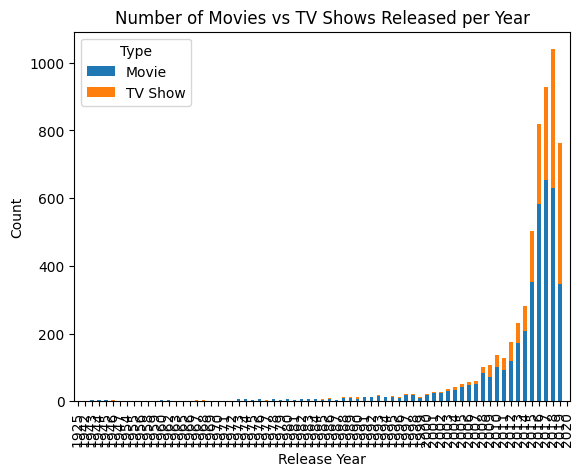

In [ ]:

import matplotlib.pyplot as plt


movies_tvshows_per_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0) #type clm has movie or tv , size() count ocurences and for reshpae using unstack() ,fillna(0) filling mising val with 0 and later the output results i the line chart we ar e using kind parameter to get bar chart and then stacked parameter to stack tye bar for each year


movies_tvshows_per_year.plot(kind='bar', stacked=True)
plt.title('Number of Movies vs TV Shows Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()


# 3) Who directed the most number of films and country associated with director

In [ ]:

director_counts = df['director'].value_counts() # Count the occurrences of each director

most_directed_director = director_counts.idxmax()  # the director with the highest count

country_associated = df[df['director'] == most_directed_director]['country'].iloc[0] # the country associated with the most directed director


print(f"The director who directed the most films is: {most_directed_director}")
print(f"The country associated with this director is: {country_associated}")


The director who directed the most films is: Raúl Campos, Jan Suter
The country associated with this director is: Mexico


# 4) Which actor and actress casted in most number of films

In [ ]:

cast_list = df['cast'].str.split(', ').explode() # exploding into separate rows

cast_counts = cast_list.value_counts()

most_appeared_actor = cast_counts.idxmax()

print(f"The actor who appeared in the most number of films is: {most_appeared_actor}")

#  the actress with the highest count
most_appeared_actress = cast_counts[cast_counts.index.str.contains('^[A-Z][a-z]*')].idxmax()

print(f"The actress who appeared in the most number of films is: {most_appeared_actress}")


The actor who appeared in the most number of films is: Anupam Kher
The actress who appeared in the most number of films is: Anupam Kher


# 5) How many Thriller movies got released in 2018?

In [ ]:

thriller_2018_count = df[(df['listed_in'].str.contains('Thriller')) & (df['release_year'] == 2018)].shape[0] # number of rows  correspodns thriller

print(f"The number of thriller movies released in 2018 is: {thriller_2018_count}")



The number of thriller movies released in 2018 is: 74


# 6) Which genre of movies was released highest in each year?


In [ ]:

genres_list = df['listed_in'].str.split(', ').explode()

highest_genre_per_year = genres_list.groupby(df['release_year']).agg(lambda x: x.mode()[0])  # mode most common genre

print(highest_genre_per_year)


release_year
1925                  TV Shows
1942            Classic Movies
1943             Documentaries
1944            Classic Movies
1945            Classic Movies
                 ...          
2016      International Movies
2017      International Movies
2018      International Movies
2019    International TV Shows
2020                Docuseries
Name: listed_in, Length: 71, dtype: object


# 7) How many Spanish based Romantic TV Shows where released in 2017?

In [ ]:
spanish_romantic_2017_count = df[(df['listed_in'].str.contains('Spanish')) &
                                  (df['listed_in'].str.contains('Romantic')) &
                                  (df['release_year'] == 2017)  &
                                  (df['type'] == 'TV Show')].shape[0]

print("The number of Spanish-based romantic TV shows released in 2017 is: {}".format(spanish_romantic_2017_count))



The number of Spanish-based romantic TV shows released in 2017 is: 1


# 8) Find the reality shows which has more than 5 seasons?

In [ ]:
# \d+ regular expression matches  one or more digits  converting it to numeric
df['season_count'] = df['duration'].str.extract('(\d+)').astype(float)

reality_shows_5_seasons = df[(df['type'] == 'TV Show') & (df['listed_in'].str.contains('Reality')) & (df['season_count'] > 5)]

print("Reality shows with more than 5 seasons:")
print(reality_shows_5_seasons[['title', 'season_count']])


Reality shows with more than 5 seasons:
                                 title  season_count
689      The Great British Baking Show           7.0
1689  Terrace House: Opening New Doors           6.0
1816                      Chef's Table           6.0
4201                West Coast Customs           6.0


# 9) Movies with more than 120 minutes and released in year 2016,2017 and 2018.

In [ ]:
movies_120_min_2016_2018 = df[(df['type'] == 'Movie') &
                               (df['duration'].str.extract('(\d+)').astype(int) > 120) &
                               (df['release_year'].isin([2016, 2017, 2018]))]
print("Movies with more than 120 minutes and released in 2016, 2017, or 2018:")
print(movies_120_min_2016_2018[['title', 'duration', 'release_year']])


Movies with more than 120 minutes and released in 2016, 2017, or 2018:
     title duration  release_year
0      NaN      NaN           NaN
1      NaN      NaN           NaN
2      NaN      NaN           NaN
3      NaN      NaN           NaN
4      NaN      NaN           NaN
...    ...      ...           ...
5832   NaN      NaN           NaN
5833   NaN      NaN           NaN
5834   NaN      NaN           NaN
5835   NaN      NaN           NaN
5836   NaN      NaN           NaN

[5837 rows x 3 columns]


# 10) Which month has the highest number of films released.Plot the chart?

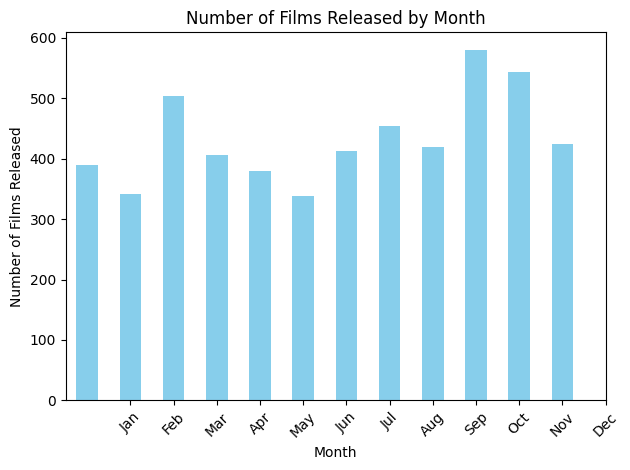

The month with the highest number of films released is: 10.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['date_added'] = pd.to_datetime(df['date_added'])

df['month_added'] = df['date_added'].dt.month

films_per_month = df.groupby('month_added').size() # date --5/1/24

highest_month = films_per_month.idxmax()

films_per_month.plot(kind='bar', color='skyblue')
plt.title('Number of Films Released by Month')
plt.xlabel('Month')
plt.ylabel('Number of Films Released')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(f"The month with the highest number of films released is: {highest_month}")


# 11 a) Year where the 5th most highest adult movies got released:

In [ ]:

adult_movies_per_year = df[df['rating'] == 'TV-MA']['release_year'].value_counts()

fifth_most_adult_year = adult_movies_per_year.index[4]

print(f"The year where the 5th most adult movies were released is: {fifth_most_adult_year}")


The year where the 5th most adult movies were released is: 2015


# b) Actor who appeared most in general audience movies:

In [ ]:

general_audience_movies = df[df['rating'] != 'TV-MA']

actor_most_appeared = general_audience_movies['cast'].str.split(', ').explode().value_counts().idxmax()

print(f"The actor who appeared most in general audience movies is: {actor_most_appeared}")


The actor who appeared most in general audience movies is: Shah Rukh Khan


# c) Director who directed most parental guidance movies:

In [ ]:

parental_guidance_movies = df[df['rating'] == 'TV-PG']

most_parental_guidance_director = parental_guidance_movies['director'].value_counts().idxmax()

print(f"The director who directed most parental guidance movies is: {most_parental_guidance_director}")


The director who directed most parental guidance movies is: Edward Cotterill


# d) Country which released most adult movies:

In [ ]:

adult_movies = df[df['rating'] == 'TV-MA']

most_adult_movies_country = adult_movies['country'].value_counts().idxmax()

print(f"The country which released most adult movies is: {most_adult_movies_country}")


The country which released most adult movies is: United States


# e) Plot a stacked bar graph yearly release of general movies vs adult movies year:

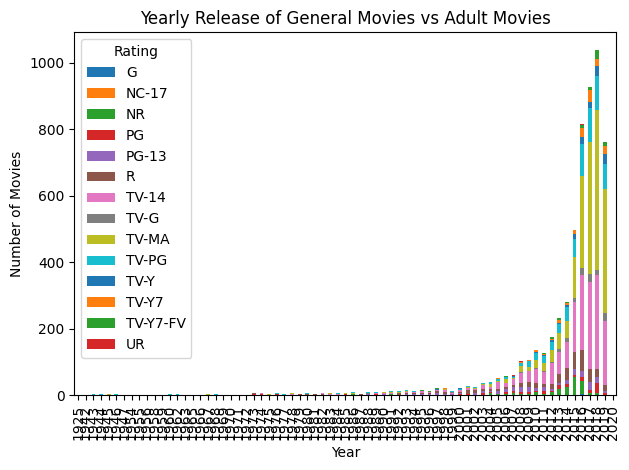

In [ ]:

movies_per_year = df.groupby(['release_year', 'rating']).size().unstack().fillna(0)

movies_per_year.plot(kind='bar', stacked=True)
plt.title('Yearly Release of General Movies vs Adult Movies')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Rating', loc='upper left')
plt.tight_layout()
plt.show()


# 12)  Which director consistently released movies and his time span


In [ ]:

director_time_span = df.groupby('director')['release_year'].agg(['min', 'max'])
director_time_span['time_span'] = director_time_span['max'] - director_time_span['min']

most_consistent_director = director_time_span['time_span'].idxmax()
time_span = director_time_span.loc[most_consistent_director, 'time_span']

print(f"The director who consistently released movies is: {most_consistent_director}")
print(f"The time span of consistent releases for this director is: {time_span} years")


The director who consistently released movies is: Orson Welles
The time span of consistent releases for this director is: 72 years


#   13)  Director and Actor which worked with most number of countries

In [ ]:

director_countries = df.groupby('director')['country'].nunique()
most_countries_director = director_countries.idxmax()
director_countries_count = director_countries.loc[most_countries_director]

print(f"The director who worked with the most number of countries is: {most_countries_director}")
print(f"Number of countries worked with: {director_countries_count}")

actor_countries = df['cast'].str.split(', ').explode().reset_index(drop=True)
actor_countries = actor_countries[actor_countries != ''].map(lambda x: 1).groupby(df['cast'].str.split(', ').explode().reset_index(drop=True)).sum()
most_countries_actor = actor_countries.idxmax()
actor_countries_count = actor_countries.loc[most_countries_actor]

print(f"The actor who worked with the most number of countries is: {most_countries_actor}")
print(f"Number of countries worked with: {actor_countries_count}")


The director who worked with the most number of countries is: Raúl Campos, Jan Suter
Number of countries worked with: 4
The actor who worked with the most number of countries is: Anupam Kher
Number of countries worked with: 29
